In [79]:
%matplotlib inline

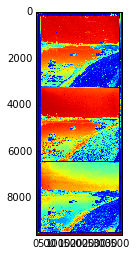

In [80]:
# Fem totes les importacions de les llibreries
import numpy as np
import matplotlib.pyplot as plt
import math 
from skimage import io
from scipy import fftpack
from scipy import signal
from scipy import misc
from PIL import Image, ImageDraw 
from scipy import ndimage 
from scipy.misc import imresize 

# Carreguem i mostrem l'imatge
image = io.imread('00029u.png')
plt.imshow(image)

(302, 336, 3)


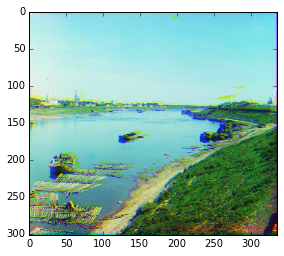

In [81]:

#LOAD IMAGES 
img = Image.open("00029u.png") 
#WARNING SIZE AND SHAPE INDICES ARE UPSIDE DOWN  
size1_size=int(round(img.size[1]/10)) 
size2_size=int(round(img.size[0]/10)) 
img = imresize(img, ( size1_size,size2_size),interp
='bilinear').astype('float') 
img_np = np.array(img) 
x1 = 20; y1 = 20; 
x2 = 25; y2 = 333; 
x3 = 24; y3 = 647; 
w = 336; h = 302; 
im1 = img_np[y1-2:y1+h-2,x1-1:x1+w-1]; 
im2 = img_np[y2-2:y2+h-2,x2-1:x2+w-1]; 
im3 = img_np[y3-2:y3+h-2,x3-1:x3+w-1]; 
I1 = 256*im1.astype('double')/im1.max(); 
I2 = 256*im2.astype('double')/im2.max(); 
I3 = 256*im3.astype('double')/im3.max(); 
BGR=np.zeros([h,w,3],dtype=type(img_np[0,0]))  
BGR[:,:,0]=I3 
BGR[:,:,1]=I2 
BGR[:,:,2]=I1

# Formalizamos la imagen BGR
BGR[:,:,0] = ((BGR[:,:,0] - BGR[:,:,0].min()) / (BGR[:,:,0].max() - BGR[:,:,0].min()))
BGR[:,:,1] = ((BGR[:,:,1] - BGR[:,:,1].min()) / (BGR[:,:,1].max() - BGR[:,:,1].min()))
BGR[:,:,2] = ((BGR[:,:,2] - BGR[:,:,2].min()) / (BGR[:,:,2].max() - BGR[:,:,2].min()))

plt.imshow(BGR)
print np.shape(BGR)

In [82]:
# Funcio que extreura els barquets de la image generica BGR
def extreurebarquet(image, bloc, zona):
    centreX = 140
    centreY = 165
    # Treiem les coordenades maximes i minimes, que ens va donar el profesor a clase, per treure una area del barquet per escanejar
    # a aquesta area li fiquem el tamany del bloc i el tamany de la zona
    xmin=centreX-bloc-zona
    xmax=centreX+bloc+zona
    ymin=centreY-bloc-zona
    ymax=centreY+bloc+zona
    
    # Amb les coordenades anteriors treiem de la imatge principal el bloc on esta el barquet dels tres canals
    barquetB=BGR[ymin:ymax,xmin:xmax,0]
    barquetG=BGR[ymin:ymax,xmin:xmax,1]
    barquetR=BGR[ymin:ymax,xmin:xmax,2]
    
    # Formalitzem amb la mitja totes les imatges dels barquets
    barquetB = ((barquetB - barquetB.min()) / (barquetB.max() - barquetB.min()))-np.mean(barquetB)
    barquetG = ((barquetG - barquetG.min()) / (barquetG.max() - barquetG.min()))-np.mean(barquetG)
    barquetR = ((barquetR - barquetR.min()) / (barquetR.max() - barquetR.min()))-np.mean(barquetR)
    return barquetB,barquetG,barquetR

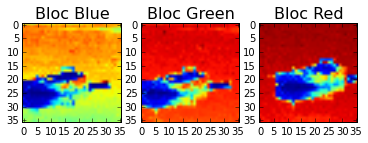

In [83]:
barquetB,barquetG,barquetR = extreurebarquet(BGR,15,3)
# Mostrem les imatges dels barquets per canals
plt.subplot(1,3,1)
plt.imshow(barquetB)
plt.title('Bloc Blue', size=16)
plt.subplot(1,3,2)
plt.imshow(barquetG)
plt.title('Bloc Green', size=16)
plt.subplot(1,3,3)
plt.imshow(barquetR)
plt.title('Bloc Red', size=16)


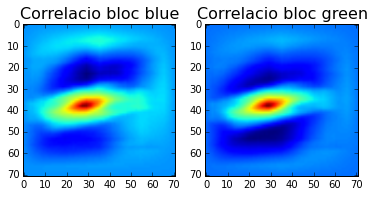

In [84]:
# Fem la correlacio entre els blocks i el template (Bloc vermell), mostrem els resultats
NCCRB=signal.correlate2d(barquetB.astype('float'), barquetR.astype('float'), mode='full', boundary='fill', fillvalue=0)
NCCRG=signal.correlate2d(barquetG.astype('float'), barquetR.astype('float'), mode='full', boundary='fill', fillvalue=0)
plt.subplot(1,2,1)
plt.imshow(NCCRB)
plt.title('Correlacio bloc blue', size=16)
plt.subplot(1,2,2)
plt.imshow(NCCRG)
plt.title('Correlacio bloc green', size=16)

In [85]:
# Funcio que trobara el punt maxim de la correlacio i retornara el vector que s'ha de desplaçar
def posmax(NCC1,mig):
    rows, columns = np.where(NCC1 == NCC1.max())
    # Agafem el punt mig de la imatge de correlacio.
    puntmig = mig
    return puntmig-rows[0], puntmig-columns[0]

posicioXRB, posicioYRB = posmax(NCCRB,35)
posicioXRG, posicioYRG = posmax(NCCRG,35)
print "Desplaçament canal Blau (dx,dy): ",posicioXRB, posicioYRB
print "Desplaçament canal Verd (dx,dy): ",posicioXRG, posicioYRG

Desplaçament canal Blau (dx,dy):  -3 7
Desplaçament canal Verd (dx,dy):  -3 7


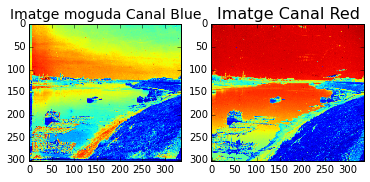

In [86]:
# Funcio que moure l'imatge al centre
def moureimatge(x,y,imatge):
    imatgeX = np.roll(imatge, x)
    imatge2 = np.roll(imatgeX, y, axis=0) 
    return imatge2

BGR[:,:,0] = moureimatge(posicioYRB,posicioXRB,BGR[:,:,0])
plt.subplot(1,2,1)
plt.imshow(BGR[:,:,0])
plt.title('Imatge moguda Canal Blue', size=14)
plt.subplot(1,2,2)
plt.imshow(BGR[:,:,2])
plt.title('Imatge Canal Red', size=16)

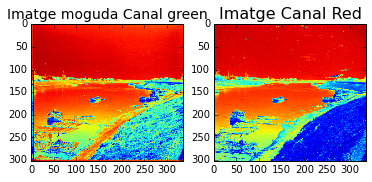

In [87]:
BGR[:,:,1]=moureimatge(posicioYRG,posicioXRG,BGR[:,:,1])
plt.subplot(1,2,1)
plt.imshow(BGR[:,:,1])
plt.title('Imatge moguda Canal green', size=14)
plt.subplot(1,2,2)
plt.imshow(BGR[:,:,2])
plt.title('Imatge Canal Red', size=16)

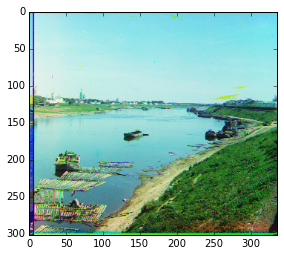

In [88]:
plt.imshow(BGR)

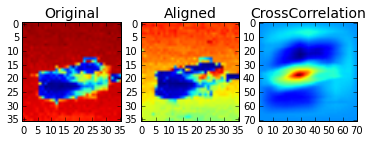

In [89]:
barquetB2,barquetG2,barquetR2=extreurebarquet(BGR,15,3)
plt.subplot(1,3,1)
plt.imshow(barquetR)
plt.title('Original', size=14)
plt.subplot(1,3,2)
plt.imshow(barquetB2)
plt.title('Aligned', size=14)
plt.subplot(1,3,3)
plt.imshow(NCCRB)
plt.title('CrossCorrelation', size=14)

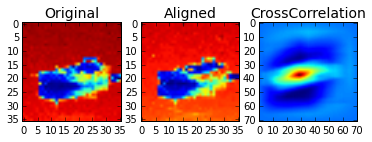

In [90]:
plt.subplot(2,3,1)
plt.imshow(barquetR)
plt.title('Original', size=14)
plt.subplot(2,3,2)
plt.imshow(barquetG2)
plt.title('Aligned', size=14)
plt.subplot(2,3,3)
plt.imshow(NCCRG)
plt.title('CrossCorrelation', size=14)

In [91]:
######################################################################################
############Segona part de la practica################################################
######################################################################################

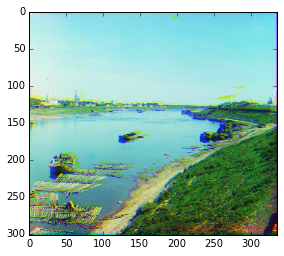

In [92]:
#LOAD IMAGES 
img = Image.open("00029u.png") 
#WARNING SIZE AND SHAPE INDICES ARE UPSIDE DOWN  
size1_size=int(round(img.size[1]/10)) 
size2_size=int(round(img.size[0]/10)) 
img = imresize(img, ( size1_size,size2_size),interp
='bilinear').astype('float') 
img_np = np.array(img) 
x1 = 20; y1 = 20; 
x2 = 25; y2 = 333; 
x3 = 24; y3 = 647; 
w = 336; h = 302; 
im1 = img_np[y1-2:y1+h-2,x1-1:x1+w-1]; 
im2 = img_np[y2-2:y2+h-2,x2-1:x2+w-1]; 
im3 = img_np[y3-2:y3+h-2,x3-1:x3+w-1]; 
I1 = 256*im1.astype('double')/im1.max(); 
I2 = 256*im2.astype('double')/im2.max(); 
I3 = 256*im3.astype('double')/im3.max(); 
BGR=np.zeros([h,w,3],dtype=type(img_np[0,0]))  
BGR[:,:,0]=I3 
BGR[:,:,1]=I2 
BGR[:,:,2]=I1

# Formalizamos la imagen BGR
BGR[:,:,0] = ((BGR[:,:,0] - BGR[:,:,0].min()) / (BGR[:,:,0].max() - BGR[:,:,0].min()))
BGR[:,:,1] = ((BGR[:,:,1] - BGR[:,:,1].min()) / (BGR[:,:,1].max() - BGR[:,:,1].min()))
BGR[:,:,2] = ((BGR[:,:,2] - BGR[:,:,2].min()) / (BGR[:,:,2].max() - BGR[:,:,2].min()))

plt.imshow(BGR)

In [102]:
# Importem les llibreries necessaries
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from PIL import Image

# Funcio que et troba la gaussiana, segons un nombre sigma
def gaussian(sigma):
    masksize=6*sigma+1 
    Igaussian=[[masksize]*masksize for x in range(masksize)]
    x0=float(masksize)/2.0
    y0=float(masksize)/2.0
    for x in range (0, masksize):
        for y in range (0, masksize):
            # Apliquem la formula de la gaussiana pas per pas
            esquer=(((x-x0)**2)/(2*(sigma**2)))
            dret=(((y-y0)**2)/(2*(sigma**2)))
            suma=esquer+dret
            Igaussian[x][y]=math.exp(-suma)

    A=1/np.sum(Igaussian)
    print (A)
    for x in range (0, masksize):
        for y in range (0, masksize):
            Igaussian[x][y]=A*Igaussian[x][y]
            
    # Mostrem la gaussiana que anem a utilitzar
    #plt.subplot(1,6,1)
    #plt.imshow(Igaussian)
    return Igaussian
# funcio que envies una imatge i et retorna l'imatge filtrada amb un filtre pasa baix
def gauss_factor(imagen,sigma,X,Y,factor):
    # Executo la funcio que ens crea la gaussiana
    gauss=gaussian(sigma)
    plt.imshow(gauss)
    
    # Creem les matrius per fer el filtre amb zeros
    
    fitr = np.zeros((X,Y,1))
    
    # Convoluciono les imatges per treure el pasa Baix
    
    fitr=signal.convolve2d(imagen,gauss,mode='same')
    
    #plt.figure()
    fitr1_4=fitr[0::factor,0::factor]
    #plt.imshow(fitr)
    
    return fitr

In [103]:
# Funcio que extreura els barquets de la image generica BGR
def extreurebarquet(image, bloc, zona):
    centreX = 140
    centreY = 165
    # Treiem les coordenades maximes i minimes, que ens va donar el profesor a clase, per treure una area del barquet per escanejar
    # a aquesta area li fiquem el tamany del bloc i el tamany de la zona
    xmin=centreX-bloc-zona
    xmax=centreX+bloc+zona
    ymin=centreY-bloc-zona
    ymax=centreY+bloc+zona
    
    # Amb les coordenades anteriors treiem de la imatge principal el bloc on esta el barquet dels tres canals
    barquetB=BGR[ymin:ymax,xmin:xmax,0]
    barquetG=BGR[ymin:ymax,xmin:xmax,1]
    barquetR=BGR[ymin:ymax,xmin:xmax,2]
    
    # Formalitzem amb la mitja totes les imatges dels barquets
    barquetB = ((barquetB - barquetB.min()) / (barquetB.max() - barquetB.min()))-np.mean(barquetB)
    barquetG = ((barquetG - barquetG.min()) / (barquetG.max() - barquetG.min()))-np.mean(barquetG)
    barquetR = ((barquetR - barquetR.min()) / (barquetR.max() - barquetR.min()))-np.mean(barquetR)
    return barquetB,barquetG,barquetR
# Funcio que moure l'imatge al centre
def moureimatge(x,y,imatge):
    imatgeX = np.roll(imatge, x)
    imatge2 = np.roll(imatgeX, y, axis=0) 
    return imatge2
# Funcio que trobara el punt maxim de la correlacio i retornara el vector que s'ha de desplaçar
def posmax(NCC1,mig):
    rows, columns = np.where(NCC1 == NCC1.max())
    # Agafem el punt mig de la imatge de correlacio.
    puntmig = mig
    return puntmig-rows[0], puntmig-columns[0]

15 3 9
imatge1 (302, 336, 3)
imatge2 (36, 36)
0.00197382668079
0.00197382668079
0.00197382668079
(-2, 1)


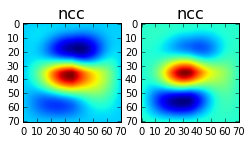

In [120]:
def piramidal(imatge):
    ################Faltaria coger uno de cada 4 pixeles en este caso, si funciona aplicarlo en un for para 
    ################que se haga con 4, 2 i 1
    ###################No comprenc com he de fer l'escalat, 
    #si filto la imatge amb gaussian, despres agafo un de cada 4 pixels la imatge es mes petita, llabors quina finestra
    #blog hauria d'agafar?
    bloc=15*1#quin factor mutiplicar?
    zona=3*1#quin factor mutiplicar?
    sigma=9*1#quin factor mutiplicar?
    print bloc,zona,sigma
    print "imatge1",np.shape(imatge)
    #filtrem la imatge amb la gaussiana de la practica anterior
    #imatge=filtreLP(imatge,sigma,np.shape(imatge)[0],np.shape(imatge)[1])
    #Ens quedem amb un de 4 pixels
    #imatge=imatge[0::4,0::4,:]
    #print "imatge2",np.shape(imatge)

    plt.imshow(imatge)
    barquetB4,barquetG4,barquetR4 = extreurebarquet(imatge,bloc,zona)
    plt.subplot(1,2,1)
    plt.imshow(barquetB4)
    plt.title('C', size=16)
    plt.subplot(1,2,2)
    plt.imshow(barquetG4)
    plt.title('Cn', size=16) 
    print "imatge2",np.shape(barquetG4)
    barquetG4=gauss_factor(barquetG4,sigma,np.shape(barquetG4)[0],np.shape(barquetG4)[1],1)
    barquetB4=gauss_factor(barquetB4,sigma,np.shape(barquetB4)[0],np.shape(barquetB4)[1],1)
    barquetR4=gauss_factor(barquetR4,sigma,np.shape(barquetR4)[0],np.shape(barquetR4)[1],1)
    plt.subplot(2,2,1)
    plt.imshow(barquetG4)
    plt.title('aa', size=16) 
    plt.subplot(2,2,2)
    plt.imshow(barquetB4)
    plt.title('aa', size=16) 
    #gaussbarquetG4=filtreLP(barquetG4,sigma,np.shape(barquetG4)[0],np.shape(barquetG4)[1])
    #print "barquet",np.shape(barquetB4)
    # Fem la correlacio entre els blocks i el template (Bloc vermell), mostrem els resultats
    NCCRB4=signal.correlate2d(barquetB4.astype('float'), barquetR4.astype('float'), mode='full', boundary='fill', fillvalue=0)
    NCCRG4=signal.correlate2d(barquetG4.astype('float'), barquetR4.astype('float'), mode='full', boundary='fill', fillvalue=0)
    plt.subplot(1,3,1)
    plt.imshow(NCCRB4)
    plt.title('ncc', size=16) 
    plt.subplot(1,3,2)
    plt.imshow(NCCRG4)
    plt.title('ncc', size=16) 
    
    print posmax(NCCRB4,np.shape(NCCRB4)[0]/2)
piramidal(BGR)

In [ ]:
    posicioXRB4, posicioYRB4 = posmax(NCCRB4,35)
    posicioXRG4, posicioYRG4 = posmax(NCCRG4,35)
    print "Desplaçament canal Blau (dx,dy): ",posicioXRB4, posicioYRB4
    print "Desplaçament canal Verd (dx,dy): ",posicioXRG4, posicioYRG4
    imatge[:,:,0] = moureimatge(posicioYRB4,posicioXRB4,imatge[:,:,0])
    imatge[:,:,1] = moureimatge(posicioYRG4,posicioXRG4,imatge[:,:,1])
    barquetB42,barquetG42,barquetR42 = extreurebarquet(imatge,bloc,zona)
    plt.subplot(2,3,1)
    plt.imshow(NCCRB4)
    plt.title('Correlacio bloc blue', size=16)
    plt.subplot(2,3,2)
    plt.imshow(NCCRG4)
    plt.title('Correlacio bloc green', size=16)
    plt.subplot(3,3,1)
    plt.imshow(barquetG4)
    plt.title('Original', size=14)
    plt.subplot(3,3,2)
    plt.imshow(barquetG42)
    plt.title('Aligned', size=14)
    plt.subplot(3,3,3)
    plt.imshow(NCCRG4)
    plt.title('CrossCorrelation', size=14)